In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")

In [3]:
from compute_costs import *

In [4]:
compute_costs(df)

C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_drugs"] = df_school["iptsc_drugs_used_school"] * df_school["drug_type"].map(cost_dict)
C:\Users\joshsu\OneDrive - Bill & Melinda Gates Foundation\Code\malaria-sac-ipt\analysis\230503\compute_costs.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_school["cost_IPTsc_consumables"] = df_school["cost_IPTsc_RDTs"] + df_schoo

In [7]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [9]:
school_marker = "o"
smc_marker = "s"

marker_dict = {i: school_marker for i in [6,7,8,9,10]}
marker_dict.update({i: smc_marker for i in [30,31,32,33]})

In [8]:
color_dict = {
    6: "#5292C2",
    7: "#5292C2",
    8: "#F48420",
    9: "#F48420",
    5: "black",
    35: "#E9CA43",
    36: "#D61C5B"
}

meta NOT subset; don't know how to subset; dropped


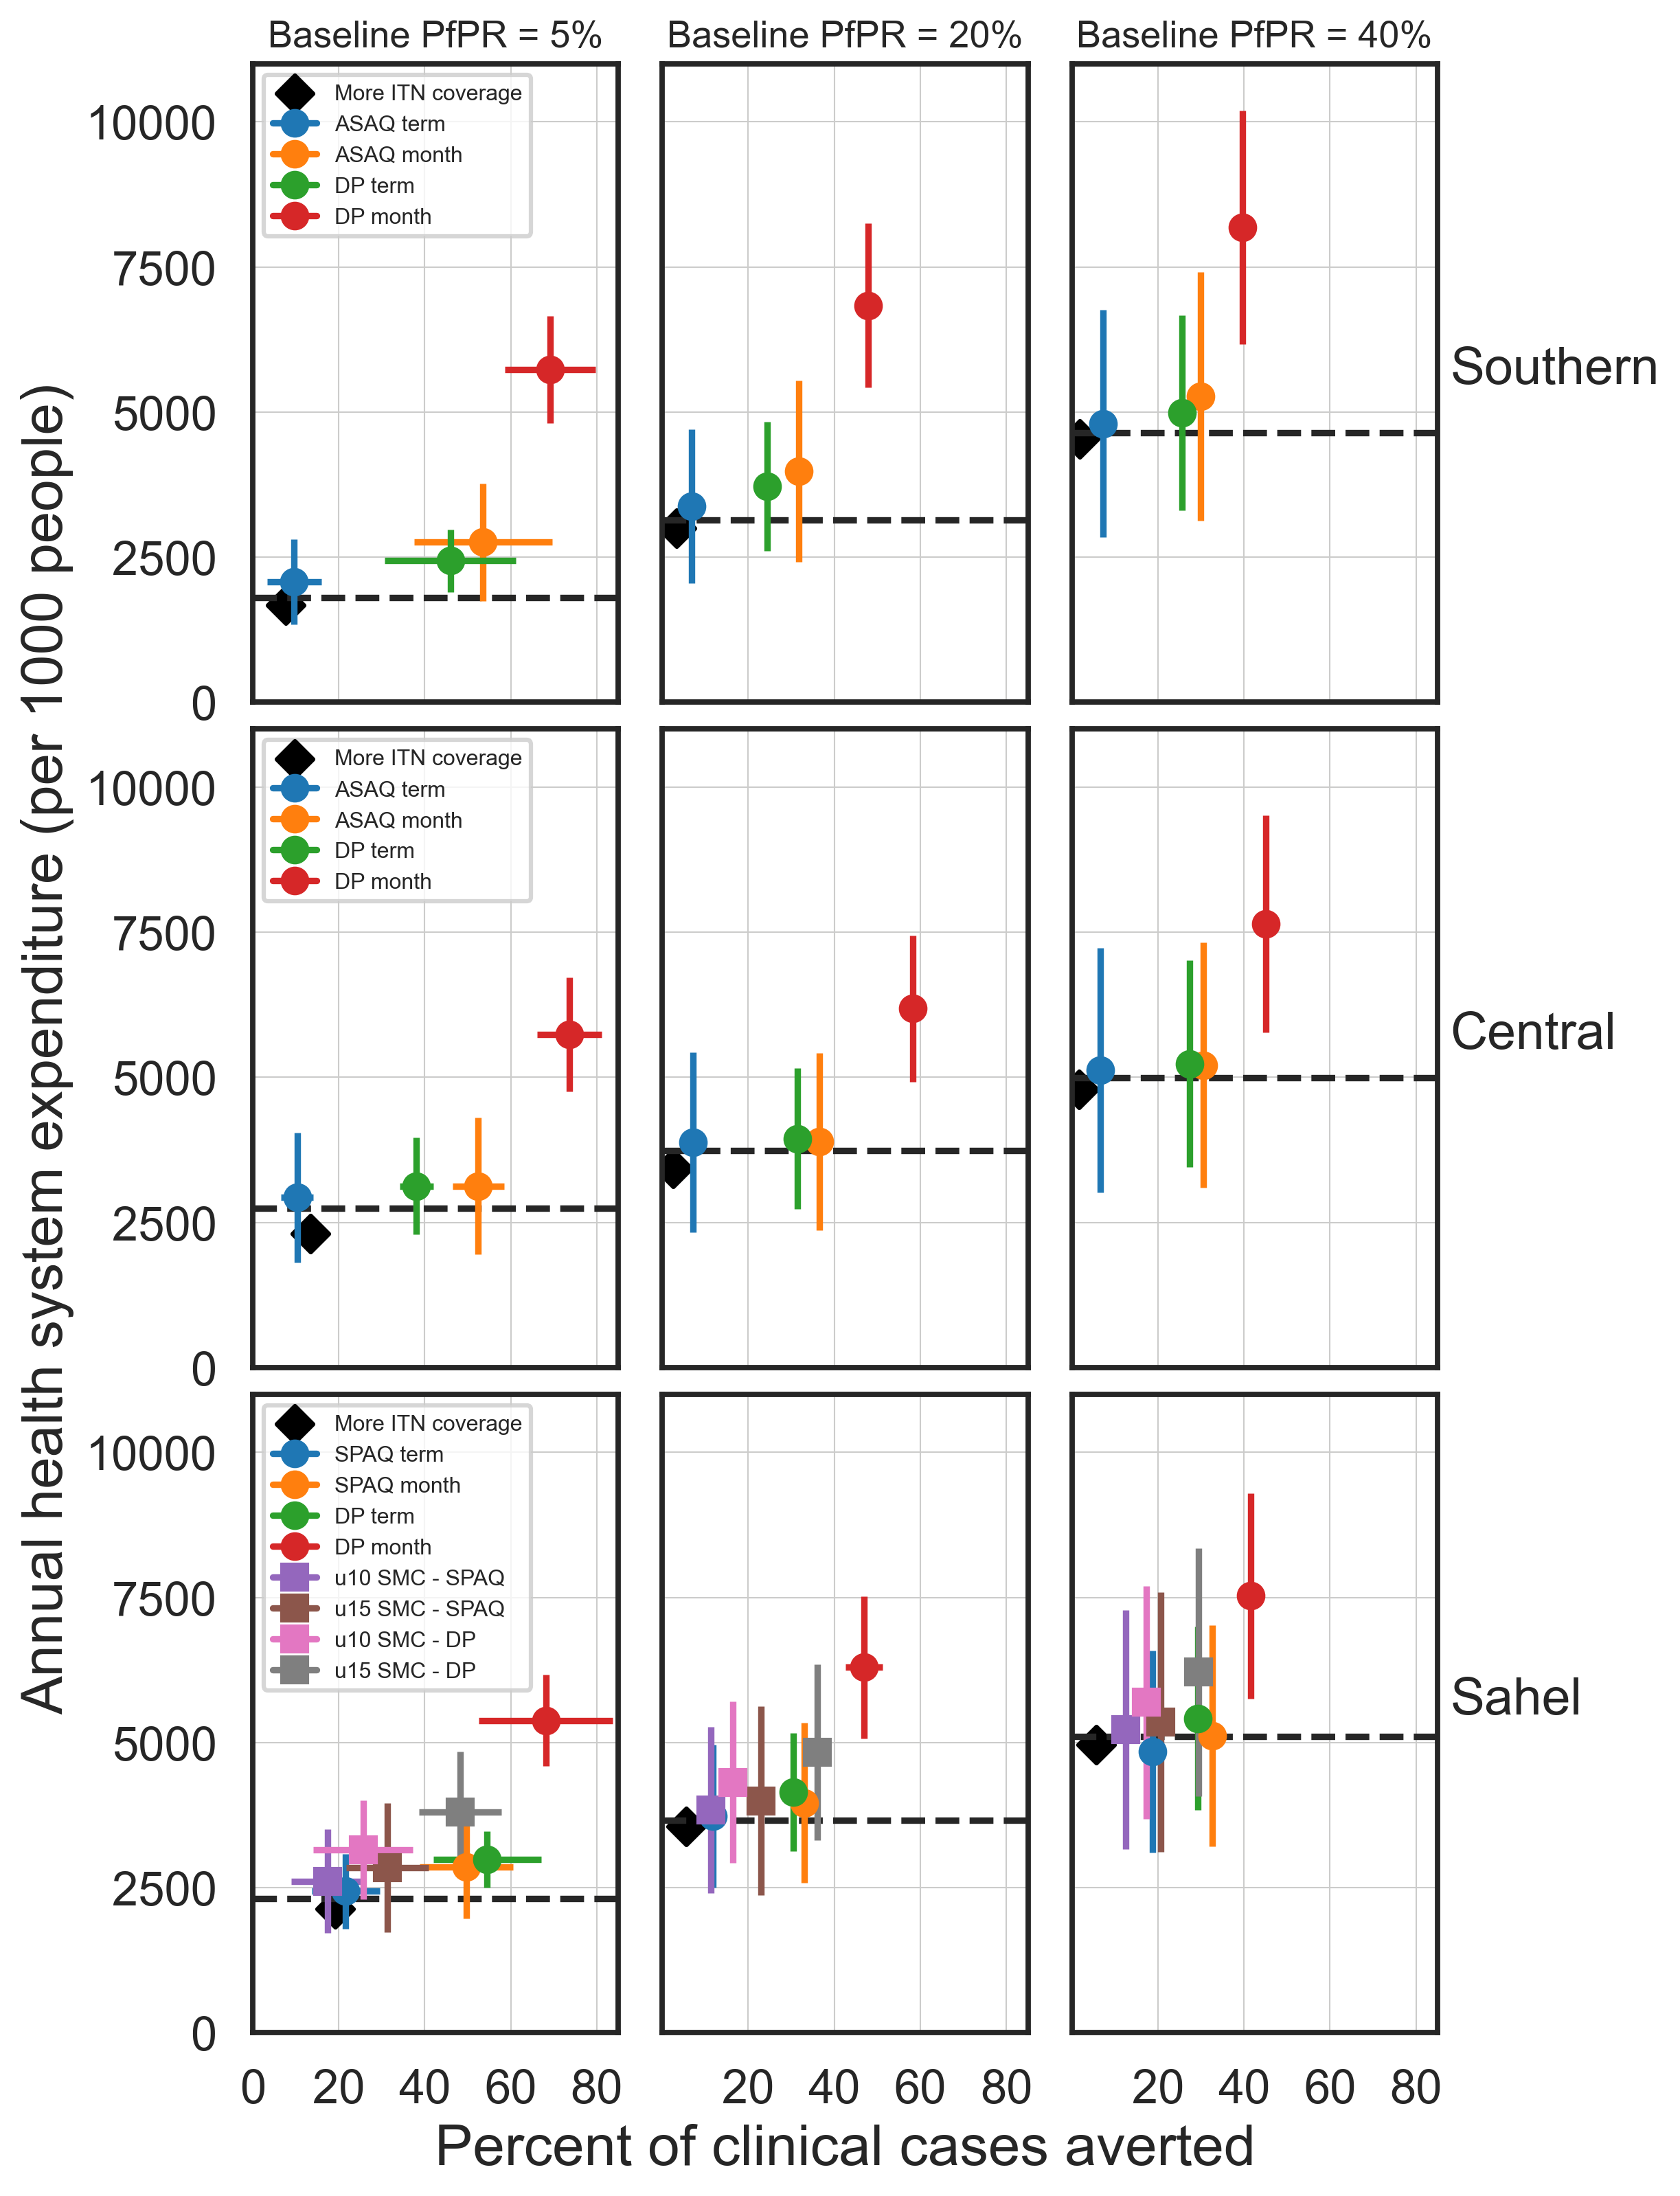

In [38]:
plt.figure(dpi=300, figsize=(8.5,11))

i = 1
for a in ["Southern", "Central", "Sahel"]:
    if a == "Sahel":
        scenario_numbers = [6,7,8,9,30,31,32,33]
    else:
        scenario_numbers = [6,7,8,9]
        
    for t in [0.05,0.2,0.4]:
        df_plot = df_pfpr[np.logical_and.reduce([
            df_pfpr["archetype"]==a,
            df_pfpr["transmission_level"]==t,
            np.in1d(df_pfpr["scenario_number"], scenario_numbers)])]
        
        plt.subplot(3,3,i)
        
        
        # No intervention
        df_bau = df_pfpr[np.logical_and.reduce([
        df_pfpr["archetype"]==a,
        df_pfpr["transmission_level"]==t,
        np.in1d(df_pfpr["scenario_number"], [0])])]
        bau_system_cost = df_bau["cost_mean_IPTsc_only"].iloc[0]/10
        plt.axhline(bau_system_cost, linestyle='dashed', color='#262626')
        
        
        # ITN only
        df_itn = df_pfpr[np.logical_and.reduce([
        df_pfpr["archetype"]==a,
        df_pfpr["transmission_level"]==t,
        np.in1d(df_pfpr["scenario_number"], [5])])]

        itn_system_cost = df_itn["cost_mean_IPTsc_only"].iloc[0]/10

        frac_cases_averted = df_itn["frac_averted_clinical__all"]
        plt.scatter(100*frac_cases_averted, itn_system_cost, label="More ITN coverage", color='black', marker='D')
        
        
        # IPTsc
        for s, sdf in df_plot.groupby("scenario_number"):
            if s in scenario_numbers:
                label = sdf["comments"].iloc[0]
                system_cost = sdf["cost_mean_IPTsc_only"]/10
                frac_cases_averted = sdf["frac_averted_clinical__all"]
                xerr = sdf["frac_averted_clinical__all_STDEV"]
                yerr = (sdf["cost_high_IPTsc_only"]-sdf["cost_mean_IPTsc_only"])/10
                
                plt.errorbar(100*frac_cases_averted, system_cost, 
                             xerr=100*xerr, yerr=yerr, 
                             marker=marker_dict[s], label=label)
        
        plt.xlim([0,85])
        plt.ylim([0,11000])
        
        if i == 1:
            plt.title("Baseline PfPR = 5%", fontsize=13)
        elif i == 2:
            plt.title("Baseline PfPR = 20%", fontsize=13)
        elif i == 3:
            plt.title("Baseline PfPR = 40%", fontsize=13)
        
        # Y-axis
        if i == 4:
            plt.ylabel("Annual health system expenditure (per 1000 people)", fontsize=20)
            # plt.ylabel("Cost per 1000 people (in thousands of dollars)", fontsize=20)
        else:
            plt.ylabel(None)
            
        yticks = [0,2500,5000,7500,10000]
        if i in [1,4,7]:
            plt.yticks(yticks)
        else:
            plt.yticks([])
            plt.ylabel(None)
            
        for yt in yticks:
            plt.axhline(yt, c="#CCCCCB", zorder=0, lw=0.5)
        
        xticks = [0,20,40,60,80]
        xticks_without_origin = [20,40,60,80]
        if i == 7:
            plt.xticks(xticks)
        elif i in [8,9]:
            plt.xticks(xticks_without_origin)
        else:
            plt.xticks([])
            plt.xlabel(None)
            
        for xt in xticks:
            plt.axvline(xt, c="#CCCCCB", zorder=0, lw=0.5)
            
        # if i in [3,6,9]:
            # plt.legend(fontsize=11, loc="lower right")
        if i in [1,4,7]:
            plt.legend(fontsize=7.7, loc="upper left")
        else:
            plt.legend([],[], frameon=False)
        
        if i == 3:
            plt.text(88,11000/2,"Southern")
        elif i == 6:
            plt.text(88,11000/2,"Central")
        elif i == 9:
            plt.text(88,11000/2,"Sahel")
            
        if i == 8:
            plt.xlabel("Percent of clinical cases averted", fontsize=20)
        else:
            plt.xlabel(None)
            
        i += 1
        
    # plt.axhline(base_cost/10, color='black', linestyle='dashed')
    # plt.scatter(itn_implementation_cost, itn_system_cost, color='black', marker='D', label="Increase ITN coverage")
plt.tight_layout(h_pad=0, w_pad=0.8)
plt.savefig("fig_s5_cost.pdf")
plt.savefig("fig_s5_cost.png")